In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import quandl as ql
import datetime as dt

In [2]:

# 3.6. Systematic Risk Hedge

# Asset/Portfolio: U.S. Large Cap Stock Market
# Tail Hedge: CBOE VXTH Index
# Hedge Funds Index: Eureka Equal Weighted Hedge Fund Index
# Leverage: U.S. Large Cap Stock Market 2x Daily Leverage
# Lending Rate: U.S. Total Money Market Mean

# Data Query and Range Delimiting
hedgelevquery1 = web.DataReader(['SPY', 'SSO'], 'yahoo', '2006-04-01', '2016-05-01')
chedgelev = hedgelevquery1['Close']
mhedgelevall = chedgelev.asfreq('M', method='pad')
mhedgelevall.columns = ['mlarge', 'm2xlarge']

hedgelevquery2 = ql.get(["CBOE/VXTH", "EUREKA/473", "USTREASURY/YIELD.1"],collapse="monthly")
hedgelevquery2 = hedgelevquery2['2006-04-01':'2016-04-30']
hedgelevquery2.columns = ['mtail', 'mhedge', 'mcash']
mhedgelevall.loc[:, 'mtail'] = hedgelevquery2['mtail']
mhedgelevall.loc[:, 'mhedge'] = hedgelevquery2['mhedge']
mhedgelevall.loc[:, 'mcash'] = hedgelevquery2['mcash']


In [3]:
# 3.6.1. Tail Risk Hedge (buy S&P 500 TR, buy OTM S&P 500 calls)

# Monthly and Annual Returns Calculation
mhedgelevall.loc[:, 'mlargeret'] = mhedgelevall.loc[:, 'mlarge'] / mhedgelevall.loc[:, 'mlarge'].shift(1) - 1
mhedgelevall.loc[:, 'alargeret'] = mhedgelevall.loc[:, 'mlarge'] / mhedgelevall.loc[:, 'mlarge'].shift(12) - 1

mhedgelevall.loc[:, 'mtailret'] = mhedgelevall.loc[:, 'mtail'] / mhedgelevall.loc[:, 'mtail'].shift(1) - 1
mhedgelevall.loc[:, 'atailret'] = mhedgelevall.loc[:, 'mtail'] / mhedgelevall.loc[:, 'mtail'].shift(12) - 1


In [4]:
# Cumulative Monthly Returns Calculation
mhedgelevall.loc[:, 'mlargecum'] = np.cumprod(mhedgelevall.loc[:, 'mlargeret'] + 1) - 1
mhedgelevall.loc[:, 'mtailcum'] = np.cumprod(mhedgelevall.loc[:, 'mtailret'] + 1) - 1


In [5]:
# Annualized Monthly Returns Calculation
mhedgelevall.loc[:, 'mlargecuma'] = np.cumprod(mhedgelevall.loc[:, 'mlargeret'] + 1)  ** (12 / len(mhedgelevall)) - 1
mhedgelevall.loc[:, 'mtailcuma'] = np.cumprod(mhedgelevall.loc[:, 'mtailret'] + 1)  ** (12 / len(mhedgelevall)) - 1


In [6]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 3, 31)
mlargereta = mhedgelevall.at[lastdate, 'mlargecuma']
mtailreta = mhedgelevall.at[lastdate, 'mtailcuma']


In [7]:
# Annualized Monthly Standard Deviation Calculation
mlargestdeva = np.std(mhedgelevall.loc[:, 'mlargeret']) * np.sqrt(12)
mtailstdeva = np.std(mhedgelevall.loc[:, 'mtailret']) * np.sqrt(12)


In [8]:
# 3.7. Hedge Funds

# Monthly and Annual Returns Calculation
mhedgelevall.loc[:, 'mhedgeret'] = mhedgelevall.loc[:, 'mhedge'] / 100


In [9]:
# Cumulative Monthly Returns Calculation
mhedgelevall.loc[:, 'mlargecum'] = np.cumprod(mhedgelevall.loc[:, 'mlargeret'] + 1) - 1
mhedgelevall.loc[:, 'mhedgecum'] = np.cumprod(mhedgelevall.loc[:, 'mhedgeret'] + 1) - 1


In [10]:
# Annualized Monthly Returns Calculation
mhedgelevall.loc[:, 'mlargecuma'] = np.cumprod(mhedgelevall.loc[:, 'mlargeret'] + 1)  ** (12 / len(mhedgelevall)) - 1
mhedgelevall.loc[:, 'mhedgecuma'] = np.cumprod(mhedgelevall.loc[:, 'mhedgeret'] + 1)  ** (12 / len(mhedgelevall)) - 1


In [11]:
# Obtain last Annualized Monthly Return
mlargereta = mhedgelevall.at[lastdate, 'mlargecuma']
mhedgereta = mhedgelevall.at[lastdate, 'mhedgecuma']


In [12]:
# Annualized Monthly Standard Deviation Calculation
mlargestdeva = np.std(mhedgelevall.loc[:, 'mlargeret']) * np.sqrt(12)
mhedgestdeva = np.std(mhedgelevall.loc[:, 'mhedgeret']) * np.sqrt(12)


In [13]:
# 3.8. Portfolio Leverage

# Monthly and Annual Returns Calculation
mhedgelevall.loc[:, 'm2xlargeret'] = mhedgelevall.loc[:, 'm2xlarge'] / mhedgelevall.loc[:, 'm2xlarge'].shift(1) - 1


In [14]:
# Cumulative Monthly Returns Calculation
mhedgelevall.loc[:, 'mlargecum'] = np.cumprod(mhedgelevall.loc[:, 'mlargeret'] + 1) - 1
mhedgelevall.loc[:, 'm2xlargecum'] = np.cumprod(mhedgelevall.loc[:, 'm2xlargeret'] + 1) - 1


In [15]:
# Annualized Monthly Returns Calculation
mhedgelevall.loc[:, 'mlargecuma'] = np.cumprod(mhedgelevall.loc[:, 'mlargeret'] + 1)  ** (12 / len(mhedgelevall)) - 1
mhedgelevall.loc[:, 'm2xlargecuma'] = np.cumprod(mhedgelevall.loc[:, 'm2xlargeret'] + 1)  ** (12 / len(mhedgelevall)) - 1


In [16]:
# Obtain last Annualized Monthly Return
mlargereta = mhedgelevall.at[lastdate, 'mlargecuma']
m2xlargereta = mhedgelevall.at[lastdate, 'm2xlargecuma']


In [17]:
# Annualized Monthly Standard Deviation Calculation
mlargestdeva = np.std(mhedgelevall.loc[:, 'mlargeret']) * np.sqrt(12)
m2xlargestdeva = np.std(mhedgelevall.loc[:, 'm2xlargeret']) * np.sqrt(12)


In [18]:
# 3.8.1. Maximum Leverage Calculation

# Lending Rate Monthly and Annual Returns Calculation
mhedgelevall.loc[:, 'mcashret'] = (mhedgelevall.loc[:, 'mcash'] / 100) / 12
mhedgelevall.loc[:, 'acasheret'] = mhedgelevall.loc[:, 'mcash'] / 100


In [19]:
# Monthly Returns Annualized
mhedgelevall.loc[:, 'mlargereta'] = mhedgelevall.loc[:, 'mlargeret'] * np.sqrt(12)


In [20]:
# Maximum Monthly Leverage Ratio Annualized
# Convert all NaN, +inf and -inf value to 0 as abs, min, max functions don't have exception
mhedgelevall[np.isnan(mhedgelevall)] = 0
mhedgelevall[np.isneginf(mhedgelevall)] = 0
mhedgelevall[np.isposinf(mhedgelevall)] = 0
mmaxlargelev = 1 / abs(min(mhedgelevall.loc[:, 'mlargereta']) - max(mhedgelevall.loc[:, 'acasheret']))


In [21]:
# Maximum Annual Leverage Ratio
amaxlargelev = 1 / abs(min(mhedgelevall.loc[:, 'alargeret']) - max(mhedgelevall.loc[:, 'acasheret']))


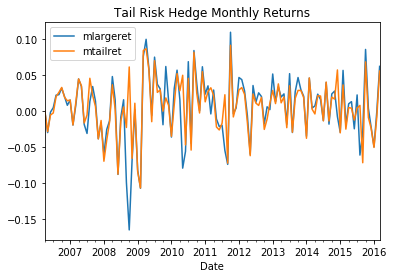

In [22]:
# 3.9. Portfolio Hedge and Leverage Charts and Tables

# 3.9.1. Tail Risk Hedge

# Monthly Returns Chart
mhedgelevall.plot(y=['mlargeret', 'mtailret'])
plt.title('Tail Risk Hedge Monthly Returns')
plt.legend(loc='upper left')
plt.show()


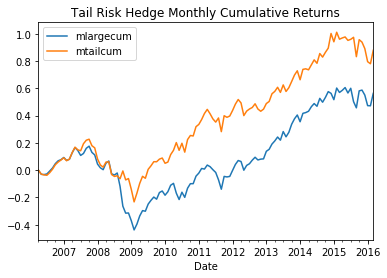

In [23]:
# Cumulative Monthly Returns Chart
mhedgelevall.plot(y=['mlargecum', 'mtailcum'])
plt.title('Tail Risk Hedge Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [24]:
# Annualized Monthly Returns and Standard Deviation
taildata = [{'0': '', '1': 'mlargeret', '2': 'mtailret'},
        {'0': 'Annualized Return', '1': mlargereta, '2': mtailreta},
        {'0': 'Annualized Standard Deviation', '1': mlargestdeva, '2': mtailstdeva}]
tailtable = pd.DataFrame(taildata)
print("")
print(tailtable)
print("")



                               0          1          2
0                                 mlargeret   mtailret
1              Annualized Return  0.0456895  0.0651068
2  Annualized Standard Deviation   0.152374    0.12867



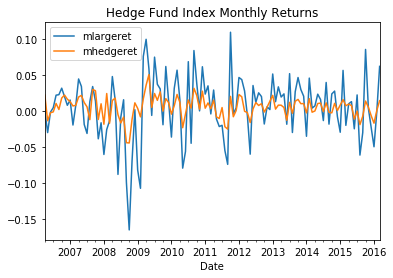

In [25]:
# 3.9.2. Hedge Funds

# Monthly Returns Chart
mhedgelevall.plot(y=['mlargeret', 'mhedgeret'])
plt.title('Hedge Fund Index Monthly Returns')
plt.legend(loc='upper left')
plt.show()


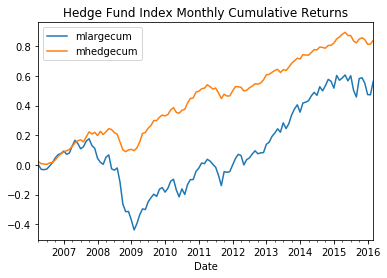

In [26]:
# Cumulative Monthly Returns Chart
mhedgelevall.plot(y=['mlargecum', 'mhedgecum'])
plt.title('Hedge Fund Index Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [27]:
# Annualized Monthly Returns and Standard Deviation
hedgedata = [{'0': '', '1': 'mlargeret', '2': 'mhedgeret'},
        {'0': 'Annualized Return', '1': mlargereta, '2': mhedgereta},
        {'0': 'Annualized Standard Deviation', '1': mlargestdeva, '2': mhedgestdeva}]
hedgetable = pd.DataFrame(hedgedata)
print("")
print(hedgetable)
print("")



                               0          1          2
0                                 mlargeret  mhedgeret
1              Annualized Return  0.0456895  0.0628257
2  Annualized Standard Deviation   0.152374  0.0510838



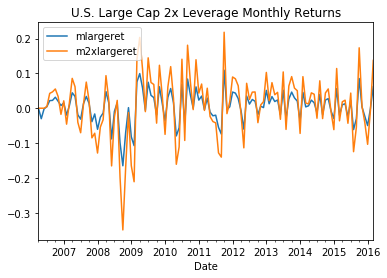

In [28]:
# 3.9.3. Portfolio Leverage

# Monthly Returns Chart
mhedgelevall.plot(y=['mlargeret', 'm2xlargeret'])
plt.title('U.S. Large Cap 2x Leverage Monthly Returns')
plt.legend(loc='upper left')
plt.show()


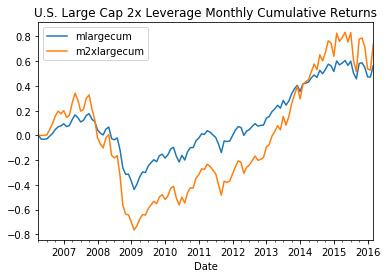

In [29]:
# Cumulative Monthly Returns Chart
mhedgelevall.plot(y=['mlargecum', 'm2xlargecum'])
plt.title('U.S. Large Cap 2x Leverage Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [31]:
# Annualized Monthly Returns and Standard Deviation
leveragedata = [{'0': '', '1': 'mlargeret', '2': 'm2xlargeret'},
        {'0': 'Annualized Return', '1': mlargereta, '2': m2xlargereta},
        {'0': 'Annualized Standard Deviation', '1': mlargestdeva, '2': m2xlargestdeva}]
leveragetable = pd.DataFrame(leveragedata)
print("")
print(leveragetable)
print("")

print("")
print('Maximum Monthly Leverage Ratio Annualized:', mmaxlargelev)
print("")

print("")
print('Maximum Annual Leverage Ratio:', amaxlargelev)
print("")


                               0          1            2
0                                 mlargeret  m2xlargeret
1              Annualized Return  0.0456895    0.0568163
2  Annualized Standard Deviation   0.152374     0.313746


Maximum Monthly Leverage Ratio Annualized: 1.60096507353


Maximum Annual Leverage Ratio: 2.0002340173

